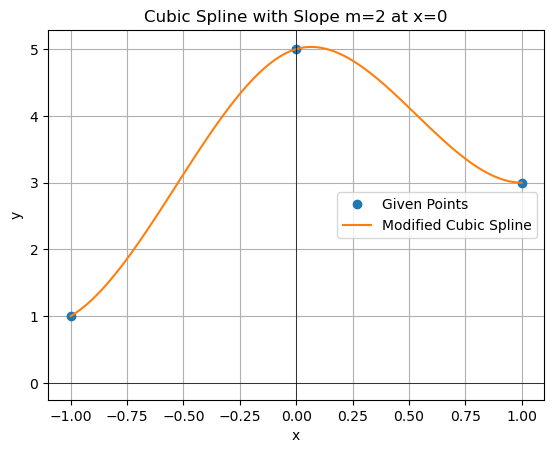

Expression of Spline S_left: S_left(x) = 1.0*(x + -1)^3 + 2.0*(x + -1)^2 + 7.0*(x + -1) + -5.0
Expression of Spline S_right: S_right(x) = 5.0*x^3 + 5.0*x^2 + -8.0*x + 5.0


In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Given data points
data_x = np.array([-1, 0, 1])
data_y = np.array([1, 5, 3])

# Desired slope at x = 0
desired_slope = 2

# Create modified cubic spline with slope condition
spline = CubicSpline(data_x, data_y, bc_type=((1, desired_slope), (1, 0)))

# Generate x-values for plotting
x_range = np.linspace(-1, 1, 100)

# Calculate spline values for x_range
spline_values = spline(x_range)

# Plot data points and spline
plt.plot(data_x, data_y, 'o', label='Given Points')
plt.plot(x_range, spline_values, label='Modified Cubic Spline')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Cubic Spline with Slope m=2 at x=0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Second derivatives at x = 0 for each spline segment
second_derivative_left = 2 * spline.c[2, 0] + 6 * spline.c[3, 0] * (0 - data_x[0])
second_derivative_right = 2 * spline.c[2, 1] + 6 * spline.c[3, 1] * (0 - data_x[1])

# Enforce continuity of second derivative
if second_derivative_left != second_derivative_right:
    spline.c[2, 1] = (second_derivative_left - 6 * spline.c[3, 1] * (0 - data_x[1])) / 2

# Recalculate second derivatives for entire range
second_derivative_left_range = 2 * spline.c[2, 0] + 6 * spline.c[3, 0] * (x_range - data_x[0])
second_derivative_right_range = 2 * spline.c[2, 1] + 6 * spline.c[3, 1] * (x_range - data_x[1])

# Spline expressions (S0 and S1) with variable names
spline_expression_left = f"S_left(x) = {spline.c[3, 0]}*(x + {data_x[0]})^3 + {spline.c[2, 0]}*(x + {data_x[0]})^2 + {spline.c[1, 0]}*(x + {data_x[0]}) + {spline.c[0, 0]}"
spline_expression_right = f"S_right(x) = {spline.c[3, 1]}*x^3 + {spline.c[2, 1]}*x^2 + {spline.c[1, 1]}*x + {spline.c[0, 1]}"

print("Expression of Spline S_left:", spline_expression_left)
print("Expression of Spline S_right:", spline_expression_right)